In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv file
df=pd.read_csv("/kaggle/input/marketing-dataset/marketing_data.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India


In [3]:
#Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Renaming income column; just by removing the space

df.rename(columns ={' Income ': 'Income'}, inplace = True)

## 1. Are there any null values or outliers? How will you handle them?

In [5]:
# Check for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

**We can see there are 24 values null values in "Income" column.**

In [6]:
#Handle null values if needed, for example, by filling with mean or median
df.fillna(df['Income'].mean(), inplace=True)

**we have handle Null values in income of consumers in marketing campaign using mean values filling.**

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Identify and handle outliers, for example, using Z-score or IQR
from scipy.stats import zscore
z_scores = zscore(df[['Income','Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Complain']])

In [9]:
df_no_outliers = df[(np.abs(z_scores) < 3).all(axis=1)]
print(df_no_outliers)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
7      1991        1967  Graduation       Together  44931.0        0   
8      4047        1954         PhD        Married  65324.0        0   
9      9477        1954         PhD        Married  65324.0        0   
...     ...         ...         ...            ...      ...      ...   
2232   7232        1973  Graduation          Widow  42429.0        0   
2234   9977        1973  Graduation       Divorced  78901.0        0   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
2            1  2014-05-13        0       134  ...            

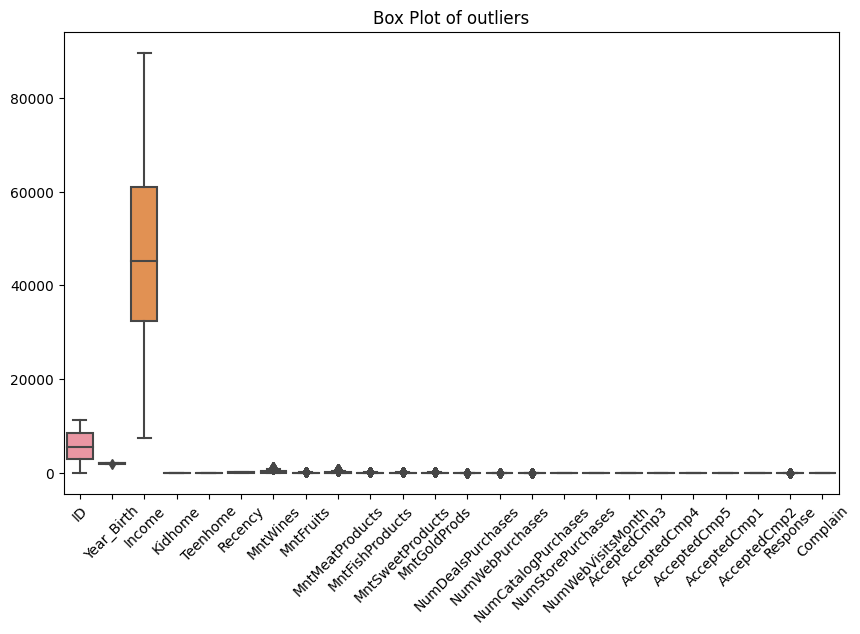

In [10]:
# Plot box plots for outliers column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45)
plt.title('Box Plot of outliers')
plt.show()

**There are 647 data are outlier as per marketing campaign**

## 2.What factors are significantly related to the number of web purchases?

In [11]:
nc = df.select_dtypes(include=[np.number]).columns

In [12]:
correlation_matrix = df[nc].corr()
web_purchase_correlation = correlation_matrix['NumWebPurchases'].sort_values(ascending=False)
print(web_purchase_correlation)

NumWebPurchases        1.000000
MntWines               0.542265
NumStorePurchases      0.502713
MntGoldProds           0.421836
Income                 0.380550
NumCatalogPurchases    0.378376
MntSweetProducts       0.348544
MntFruits              0.296735
MntMeatProducts        0.293761
MntFishProducts        0.293681
NumDealsPurchases      0.234185
AcceptedCmp4           0.155903
Teenhome               0.155500
AcceptedCmp1           0.155143
Response               0.148730
AcceptedCmp5           0.138684
AcceptedCmp3           0.042176
AcceptedCmp2           0.034188
Recency               -0.010726
Complain              -0.016310
ID                    -0.018924
NumWebVisitsMonth     -0.055846
Year_Birth            -0.145040
Kidhome               -0.361647
Name: NumWebPurchases, dtype: float64


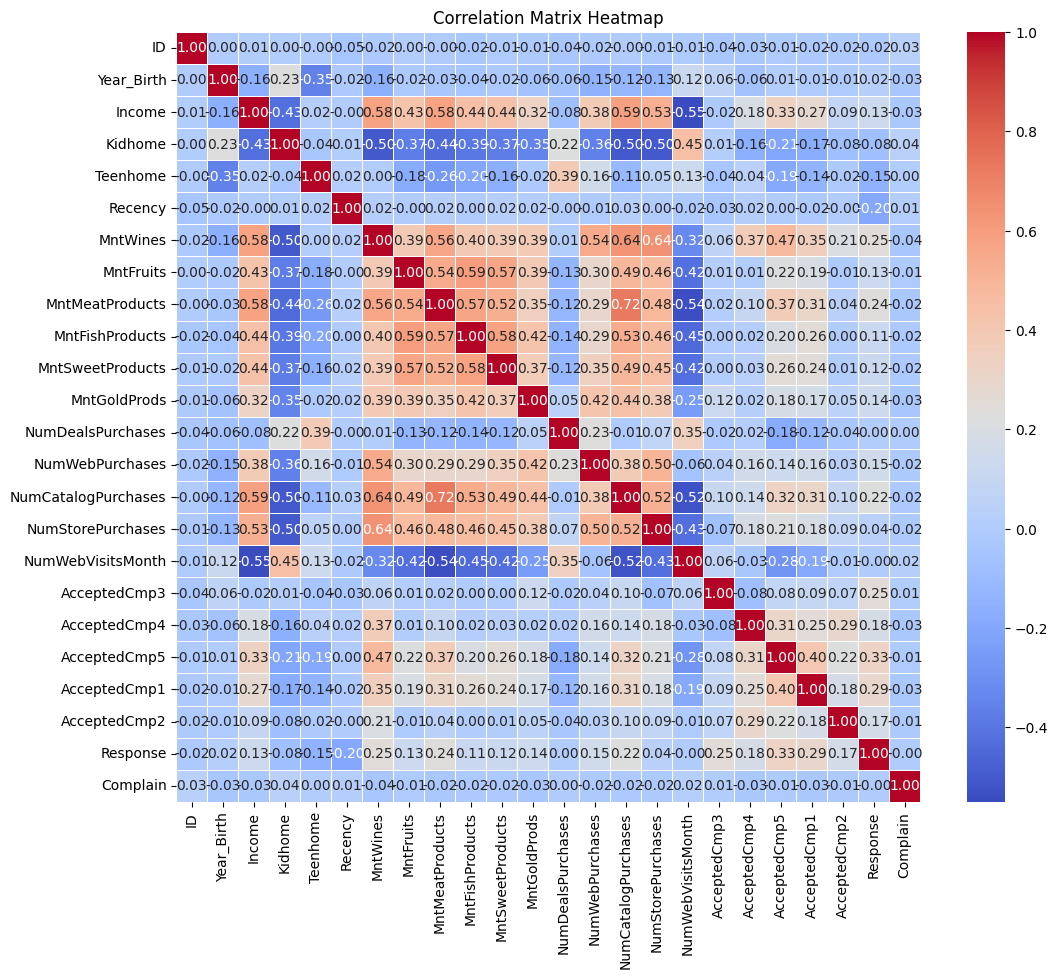

In [13]:
# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Calculate age of each customer
current_year = 2024  # Assuming the current year is 2024
df['Age'] = current_year - df['Year_Birth']

In [15]:
# Define age ranges
age_bins = [0, 30, 40, 50, 60, 70, 120]  # You can adjust these age ranges as needed
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [16]:
# Categorize customers into age ranges
df['Age_Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


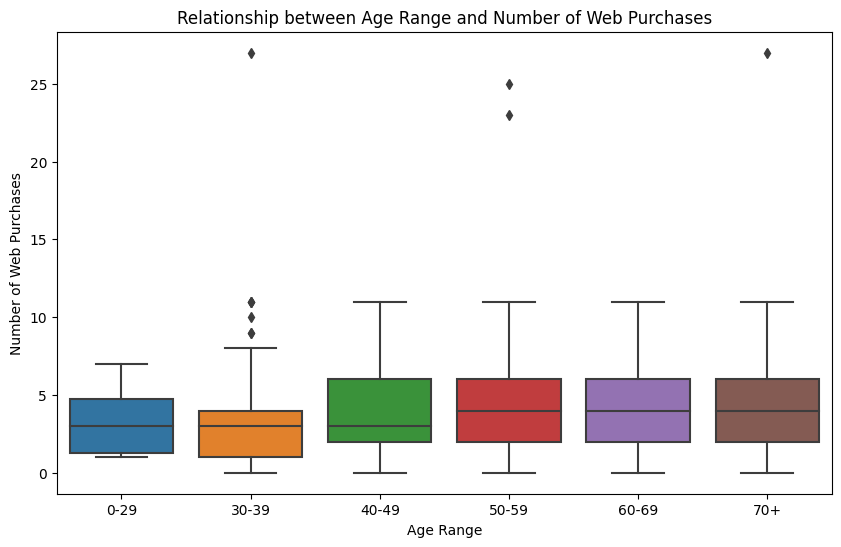

In [17]:
# Visualize the relationship between age range and number of web purchases
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Range', y='NumWebPurchases', data=df)
plt.xlabel('Age Range')
plt.ylabel('Number of Web Purchases')
plt.title('Relationship between Age Range and Number of Web Purchases')
plt.show()

## 3.Which marketing campaign was the most successful?

In [18]:
# Most successful marketing campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

In [19]:
campaign_success = df[campaign_columns].sum()
most_successful_campaign = campaign_success.idxmax()

In [20]:
print(f"The most successful campaign was: {most_successful_campaign}")

The most successful campaign was: AcceptedCmp4


In [21]:
response_rates = {}
for column in campaign_columns:
    response_rate = df[column].sum() / len(df) * 100
    response_rates[column] = response_rate

In [22]:
print(response_rates)

{'AcceptedCmp1': 6.428571428571428, 'AcceptedCmp2': 1.3392857142857142, 'AcceptedCmp3': 7.276785714285714, 'AcceptedCmp4': 7.455357142857142, 'AcceptedCmp5': 7.276785714285714}


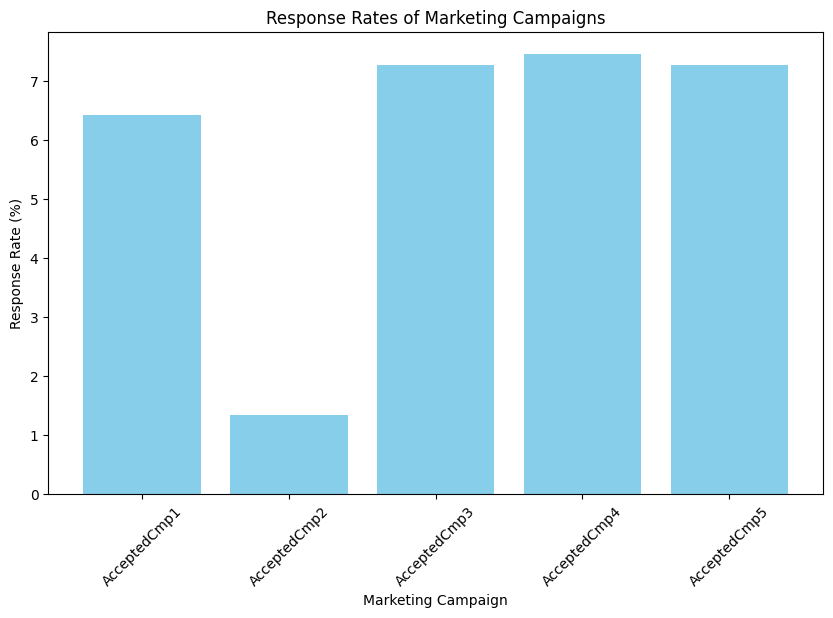

In [23]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(response_rates.keys(), response_rates.values(), color='skyblue')
plt.xlabel('Marketing Campaign')
plt.ylabel('Response Rate (%)')
plt.title('Response Rates of Marketing Campaigns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**The most successful campaign is AcceptedCmp4 with a response rate of 7.46%.**

## 3.What does the average customer look like?

In [24]:
# Calculate mean values for demographic and behavioral variables
mean_age = df['Age'].mean()
mean_income = df['Income'].mean()
mean_num_children = (df['Kidhome'] + df['Teenhome']).mean()  # Total number of children
mean_num_web_purchases = df['NumWebPurchases'].mean()
mean_MntGoldProds=df['MntGoldProds'].mean()
mean_Num_Store_Purchases=df['NumStorePurchases'].mean()

In [25]:
# Print the mean values
print(f"Average Age: {mean_age:.2f} years")
print(f"Average Income: ${mean_income:.2f}")
print(f"Average Number of Children: {mean_num_children:.2f}")
print(f"Average Number of Web Purchases: {mean_num_web_purchases:.2f}")
print(f"Average mntgoldproduct: {mean_MntGoldProds:.2f}")
print(f"Average Number store purchases:{mean_Num_Store_Purchases:.2f}")

Average Age: 55.19 years
Average Income: $52247.25
Average Number of Children: 0.95
Average Number of Web Purchases: 4.08
Average mntgoldproduct: 44.02
Average Number store purchases:5.79


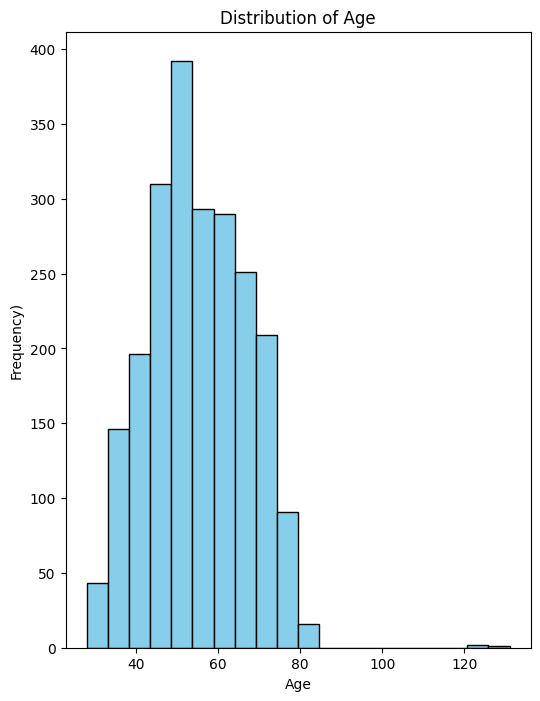

In [26]:
#Histogram for Age
plt.figure(figsize=(6, 8))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency)')
plt.title('Distribution of Age')
plt.show()

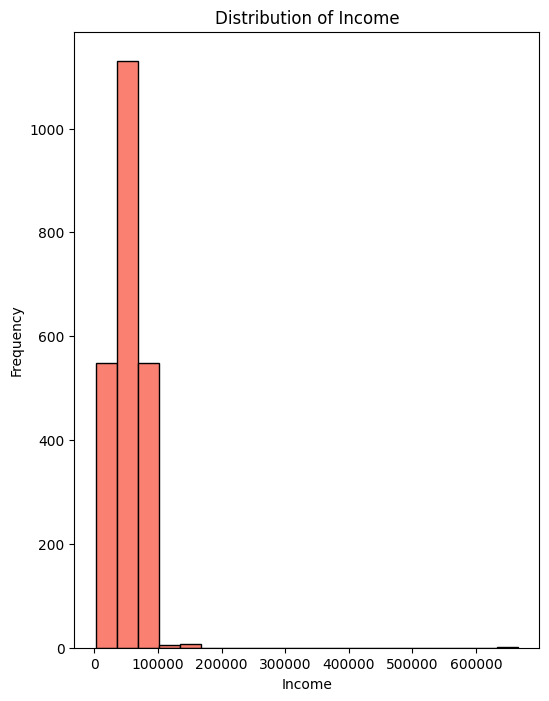

In [27]:
#Histogram for Income
plt.figure(figsize=(6, 8))
plt.hist(df['Income'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

## 5.Which products are performing best?

In [28]:
# Best performing products
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [30]:
best_performing_products = df[product_columns].idxmax()

In [31]:
print(f"The best performing products are: {best_performing_products}")

The best performing products are: MntWines            1293
MntFruits            583
MntMeatProducts      325
MntFishProducts      169
MntSweetProducts     449
MntGoldProds         449
dtype: int64


In [32]:
# Calculate total spending for each product category
total_spending = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'MeatProducts': df['MntMeatProducts'].sum(),
    'FishProducts': df['MntFishProducts'].sum(),
    'SweetProducts': df['MntSweetProducts'].sum(),
    'GoldProducts': df['MntGoldProds'].sum()
}

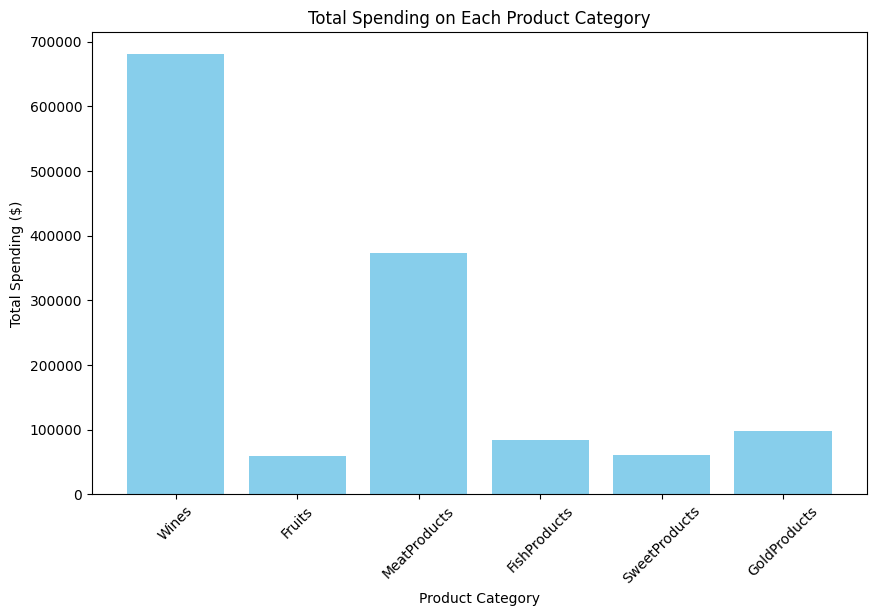

In [33]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_spending.keys(), total_spending.values(), color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Spending ($)')
plt.title('Total Spending on Each Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**The best-performing product category is Wines with a total spending of $680,816.00**

## 6.Which channels are underperforming?

In [34]:
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [35]:
underperforming_channels = df[channel_columns].idxmin()
print(f"The underperforming channels are: {underperforming_channels}")

The underperforming channels are: NumWebPurchases        37
NumCatalogPurchases     3
NumStorePurchases      14
dtype: int64


In [36]:
# Calculate total number of purchases made through each channel
total_purchases = {
    'Web': df['NumWebPurchases'].sum(),
    'Catalog': df['NumCatalogPurchases'].sum(),
    'Store': df['NumStorePurchases'].sum()
}

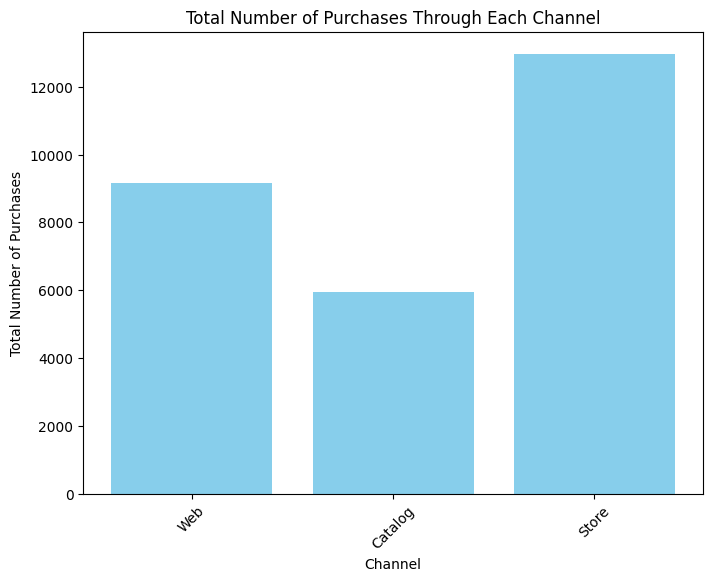

In [37]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(total_purchases.keys(), total_purchases.values(), color='skyblue')
plt.xlabel('Channel')
plt.ylabel('Total Number of Purchases')
plt.title('Total Number of Purchases Through Each Channel')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**The underperforming channel is Catalog with a total of 5963 purchases.**